# Lagrangian Transport

Until now we have only considered rigid objects that move in time. They could have been a falling water drop or the trajectory of a ship crossing a river. Most problems that are relevant in geodynamics, however, require calculating the internal deformation of solids and fluids. For example, the fracture of crustal material, the slow deformation of deep mantle, or the chaotic motion of iron in the outer core of the Earth. To understand these systems we need to define deformation quantitatively. Physics tell us that evolutionary laws are expressed as the time derivative of certain key quantities such as velocity, momentum and energy. To quantify deformation we need to combine derivation in space with derivation in time. For example, to quantify the internal deformation we use the so-called Strain, which is the change of displacement in a direction versus the space in the same (bulk) or another (shear) direction.

### Strain and Strain Rate

To calculate Strain and Strain Rate we need first to define the derivative in 2 and 3 dimensions of the vectors displacement and velocity. This is normally called gradient of a vector, indicated with the symbol $\nabla$ and is expressed as:

\begin{equation}
\label{gradientVector}
 \frac{\partial {\bf s}}{\partial {\bf x}} =
\begin{bmatrix}
\frac{\partial{s_x}}{\partial{x}} & \frac{\partial{s_x}}{\partial{y}} \\
\frac{\partial{s_y}}{\partial{x}} & \frac{\partial{s_y}}{\partial{y}}
\end{bmatrix} = \nabla {\bf s}
\; \; \; \;\; \;
 \frac{\partial {\bf v}}{\partial {\bf x}} =
\begin{bmatrix}
\frac{\partial{v_x}}{\partial{x}} & \frac{\partial{v_x}}{\partial{y}} \\
\frac{\partial{v_y}}{\partial{x}} & \frac{\partial{v_y}}{\partial{y}}
\end{bmatrix} =  \nabla {\bf v}
\end{equation}

The stress and strain rate are very similar. The only difference is that they are the symmetric component of them, they are indicated with the symbol ${\bf \epsilon}$ (Strain) or ${\bf \dot{\epsilon}}$ (Strain Rate). Explicitly, in 2D, they are expressed by the average between the gradient and its transpose. Strain therefore becomes:

\begin{equation}
\label{StrainDefinition}
{\bf \epsilon} = \frac{1}{2} \left(  \nabla {\bf s} +  \nabla {\bf s}^T \right)  = 
\begin{bmatrix}
\frac{\partial{s_x}}{\partial{x}} & \frac{1}{2} \left( \frac{\partial{s_x}}{\partial{y}} + \frac{\partial{s_y}}{\partial{x}} \right) \\
\frac{1}{2} \left( \frac{\partial{s_x}}{\partial{y}} + \frac{\partial{s_y}}{\partial{x}} \right) & \frac{\partial{s_y}}{\partial{y}}
\end{bmatrix} 
\end{equation}

And strain rate:

\begin{equation}
\label{StrainRateDefinition}
{\bf \dot{\epsilon}} =  \frac{1}{2} \left(  \nabla {\bf v}  +  \nabla {\bf v}^T \right) = 
\begin{bmatrix}
\frac{\partial{v_x}}{\partial{x}} & \frac{1}{2} \left( \frac{\partial{v_x}}{\partial{y}} + \frac{\partial{v_y}}{\partial{x}} \right) \\
\frac{1}{2} \left( \frac{\partial{v_x}}{\partial{y}} + \frac{\partial{v_y}}{\partial{x}} \right) & \frac{\partial{v_y}}{\partial{y}}
\end{bmatrix} 
\end{equation}

The mathematical expressions above are called __tensors__ It has $n \times n$ components, where n is the number of dimensions. Despite their scary name tensors are very simple. When we derive a quantity in 2D, let's say velocity, we can derive $v_x$ or $v_y$ by either $x$ or $y$, therefore there are 4 derivates, i.e. $2x2$. Similarly in 3D we have 3 velocity components to derive by three axes, i.e. $3x3=9$ components. Derivatives in n-dimensions, therefore, are objects that have $n$ times components respect to the derived object. Space derivatives of the Strain Rate in 3D, for example, has $9x3=27$ components. We will not deal with these objects here, but it is important to keep in mind that they exist and in computational geodynamics one may deal with them one day.  

Before starting to solve continuum mechanics equations, we need to learn few important things. One is Lagrangian transport. One one side this is a very important subject because even knowing exactly the value of a conservative field on a high resolution cartesian networks of points in the space (lattice), to project this field on some points in space is an intrinsically diffusive process. Diffusive here it means that any front or any sharp boundary, will be smoothed by the projection process. 

Diffusion has a particular important effect when we are project the velocity itself from a cartesian grid to points in space that we want to transport. As we will see more in detail in the chapter of diffusion, any mathematical expression involving second derivatives in space (as in every diffusion process, as well as in Stokes and Darcy flow) is expressed on a set of discrete points in space, its discretization itself produces extra terms that have the form of a wave equation. In other words every sharp boundary, when advected with a finite difference computational scheme, will become the front of a wave that propagates with its own properties, that depend on the sharpness of the front itself. 

I will show some examples of this behavior in the rest of the book. In this chapter I will instead focus on how advection can be performed by projecting the key quantities (velocity, temperature, composition) from the lattice to a set of moving particles. This method minimizes errors by reducing diffusion and avoids instabilities like the wave propagation. 


### Rigid Rotation

Rigid rotation is the motion of a system that revolves around an axis. It can involve only one body that rotates around an internal axis, which implies large variations of angular velocity between different parts of a body, or or that rotates around a far axis, in which case the rotational component is only a perturbation on a linear translation. Since all shapes are preserved during motion, while at the same time non-linearly crossing any background cartesian mesh, this form of transport is an excellent test for boundary transport algorithms. 

Computer scientist have in fact envisaged many algorithms to deal with such a problem, all based on a variety of approximations. Before testing a set of methods, let's start from a simple setup, i.e. the transport of a set of points that regularly placed points defining a surface dividing two domains. The points will initially be placed in a circular shape. We assume that the fluid $A$ is contained in the circle, while the fluid $B$ is everywhere else. We will indicate from now these points as particles, as they introduce us for the first time to the features of the general "Particle in Cell" numerical method.

A normalized expression of the velocity field associated to rotation is given by the simple expressions:

\begin{align}
v_x &= -y  \nonumber \\ 
v_y &= x \label{eq-rotational-field} 
\end{align}



![k](figures/rigidrotation.jpg)

Let us take an example of a rigid spherical platform that is kept horizontally as shown as in the above figure. The platform is being rotated with constant angular velocity ($\omega$) about the vertical axis that passes through the center of the platform. 100 small beads are placed over the platform making circular shape. Our target is to write a python script that simulates the motion of these 100 beads/particles over time. As the rotation is rigid, the particles should rotate along with the platform without changing the circular shape.  

Let's create now a Python program that can transport the particles. After importing the necessary modules, we can create a 2D arrays $X-Y$ and calculate the velocity field on each node of the mesh. Let's call "nxp" and "nyp" the number of nodes (points) in the x and y direction, and "nxc=nxp-1" and "nyc=nyp-1" the respective number of intervals (cells). For simplicity we assume that x and y both vary between $-0.5$ and $0.5$:

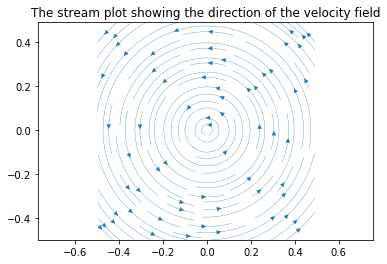

In [80]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

nxp=101; nxc=nxp-1; nyp=101; nyc=nyp-1
xTot=1.0; dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
yTot=1.0; dy=yTot/nyc; yMin=-yTot/2.0; yMax=yTot/2.0

# allocate the lattice arrays
X = np.arange(nxp, dtype=float)*dx+xMin  # x lattice coordinates
Y = np.arange(nyp, dtype=float)*dy+yMin  # y lattice coordinates

vx = np.zeros((nxp,nyp), float)  # x-velocity at nodes
vy = np.zeros((nxp,nyp), float)  # y-velocity at nodes

# initialize the velocity field
for iy in np.arange(0,nyp): vx[:,iy] = -Y[iy] #**2*np.sign(Y[iy])
for ix in np.arange(0,nxp): vy[ix,:] = X[ix]

plt.streamplot( X[0:nxc], Y[0:nyc], vx[0:nxc,0:nyc].transpose(), vy[0:nxc,0:nyc].transpose(), linewidth=.3)
plt.axis("equal")
plt.title("The stream plot showing the direction of the velocity field")
plt.show()

Where we have also allocated the memory for the velocities at the nodes. We don't mind about using here "for" loops because we use them only once, to initialize the system. Still we want to avoid them for repeated tasks, and find a vectorized version of the code. The flow is represented by the blue lines in the figure. 

The idea of particle in cell method is proceed through four phases: 
1. Interpolate fields from mesh (lattice) to particles
2. Move the particles
3. Project physical quantities from the particles to the mesh
4. Recalculate the fields on the mesh (lattice) 

Since our goal is now to create an initial version of a  particle in set code for Geodynamic problems, we will need to project the velocity field from the lattice (cartesian mesh) to the particles. Let's therefore allocate arrays for storing particle position and the projected particle velocity. 

###### Representating particle
The program keeps track of the position of the particles in two dimensional plane with the help of two arrays, namely 'px' and 'py'. The corresponding coordinates of those arrays give the value of x and y coordinate of the particles. <br/>
For example: (px[1],py[1]) are the position coordinates of second particle.
<img style=" align:center display:inline" src="figures/particlevector.jpg" width="350"  alt="particle vector" />

In [81]:
nP=100  #number of particles

#position of the particles
px=np.zeros(nP, float) # x-position
py=np.zeros(nP, float) # y-position

#copy of the position
pxNew=px.copy()
pyNew=py.copy() 
 

vxp=np.zeros(nP, float)
vyp=np.zeros(nP, float)
vxp2=np.zeros(nP, float)
vyp2=np.zeros(nP, float)

For pedagogical purposes, it is useful to gradually increase the number the particles. We have initially test a very small set, just 100, of particles. In later applications we will fill the entire computational space and associated physical fields (such as composition and temperature) to each particle. Since our particles will be in great number, it is essential that every operation on the particle is vectorized, to develop an already optimal code. 

We will place the 100 particles to initially form the shape of a circle. This allows us to immediately monitor the evolution of its shape vs time. We will place the circle with the center at $1/4$ to the side of the domain center, with a radius equal to $1/10$ of the length of the domain side.


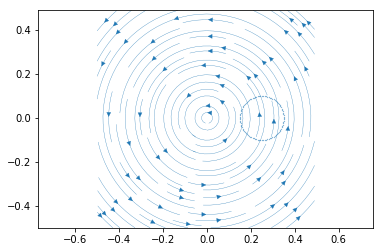

In [82]:
# initialize particle position
centerX=(xMin+xMax)/2.0+xTot*1./4.
centerY=(yMin+yMax)/2.0
radiusCircle=0.1*xTot
dTheta = 2*np.pi / nP
for iTheta in np.arange(nP):
    theta=iTheta * dTheta
    px[iTheta]=centerX+np.sin(theta)*radiusCircle
    py[iTheta]=centerY+np.cos(theta)*radiusCircle
    
plt.streamplot( X[0:nxc], Y[0:nyc], vx[0:nxc,0:nyc].transpose(), vy[0:nxc,0:nyc].transpose(), linewidth=.3)
plt.scatter(px, py, s=.05, alpha=1.0)
plt.axis("equal")
plt.show()

To have particles that transport material and fields does not entirely solve the problem of diffusion. Instead it transfers the uncertainties that create diffusion into a new uncertainty, which is how to project the information from the mesh to the particles. We have learned in previous section that there are many ways exist to average quantities. We have here four nodes and some particles distributed inside these cells. The easiest way to project the lattice value to each particle is by calculating a weighted average from the four nodes delimiting the cell in which it is located. There are however other more sophisticated possibilities, like spectral methods (approximating the field with the summation of sinusoidals), spline development (approximation through delimited polynomials), but these methods go beyond the introductory character of this book and are generally computationally expensive. To use just a linear approach is fast and easier to vectorize and to develop in parallel. 

To perform the projection we need two groups of arrays. One composed by two arrays of integers tracking the index of the cell where the particle is located, here called "trIX" and "trIY", the other composed by the four weights relating the particles with the four neighboring nodes, called "w1", "w2", "w3" and "w4". Let's allocate them:
 

In [83]:
trIX=np.zeros(nP, int)
trIY=np.zeros(nP, int)
w1=np.zeros(nP, float)
w2=np.zeros(nP, float)
w3=np.zeros(nP, float)
w4=np.zeros(nP, float)

We are ready now to run the simulation and test several implementations of the weight and see which one is the best. Since the rotation has an angular velocity of one, the time required for a perfect rotation is $\pi$ (non-dimensional). To observe the solution it is wise to plot only regular snapshot. For this reason we can create the variable "plotEverySteps", together with deltaTime that indicates the time necessary for one step:

In [84]:
steps=1000
totalTime=2*np.pi
plotEverySteps=20
deltaTime=totalTime/steps

### Calculating the cell index of the Particles
<img style=" align:center display:inline" src="figures/position1.jpg" width="250"  alt="particle vector" />
Before applying the weighting techniques, the cell index for each particles has to be determined. A cell index is the location of the cell on which the particle is located. 
Let us take an example in which there are 2 particles P1 and P2 located on the grid as shown as in the above figure. Now we will write a script that will be calculate the index of those two particles.

In [85]:
nxp1=5;nyp1=5;xMin1=-2.;yMin1=-2.;dx1=1.;dy1=1.;xTotal=4;yTotal=4
GridX = np.arange(nxp1, dtype=float)*dx1+xMin1#X coordinates of the Lattice
GridY=np.arange(nyp1, dtype=float)*dy1+yMin1# Y coordinates of the Lattice
particleX=np.array([0.1,-1.8]) #X coordinates of the particles
particleY=np.array([0.1,1.3]) #Y coordinates of the particles

#Code to calculate the index of the particles
indexX=((particleX-xMin1)*(nxp1-1)/xTotal).astype(int)
indexY=((particleY-yMin1)*(nyp1-1)/yTotal).astype(int)

print("For first partile the index is(", indexX[0],",",indexY[0],")")
print("And for the second partile the index is(", indexX[1],",",indexY[1],")")

For first partile the index is( 2 , 2 )
And for the second partile the index is( 0 , 3 )


### Cell - Particles projections

Since we want to test several weighting strategies, it is smart to create different routines depending on which weighting we like to choose. For example let's use some standard method used in numerous Particles in Cell implementations based on having weights equal to $1/|x_p-x_n|$, i.e. the weight is inversely proportional to the closest node. This solution has the advantage that when a particle is close to a node, a straightforward arithmetic average will give to the particles the node field's value. This feature has however also the opposite characteristic, which is to make the projection from the Particles to the Cell unstable, because the node would take the value of the particle just if one particle passes randomly near a node. For this reason a more stable method is recommended for the projecting a field from particles to cell, which is the __Bilinear__ scheme. There are also many more options, some more advanced and sophisticated, like the ones based on "Voronoi" triangulation, but their detailed implementation goes beyond the scope of this book.

In [86]:
from numpy.linalg import norm
def calculateWeightsInverse(xt,yt,X,Y,trIX,trIY,w1,w2,w3,w4,pN):
    # pN is the number of particles
    w1[0:pN] = 1/norm(np.array( [xt[0:pN]-X[trIX[0:pN]] , yt[0:pN]-Y[trIY[0:pN]]]), axis=0)
    w2[0:pN] = 1/norm(np.array( [xt[0:pN]-X[trIX[0:pN]+1] , yt[0:pN]-Y[trIY[0:pN]]]), axis=0)
    w3[0:pN] = 1/norm(np.array( [xt[0:pN]-X[trIX[0:pN]] , yt[0:pN]-Y[trIY[0:pN]+1]]), axis=0)
    w4[0:pN] = 1/norm(np.array( [xt[0:pN]-X[trIX[0:pN]+1] , yt[0:pN]-Y[trIY[0:pN]+1]]), axis=0)
    return(w1,w2,w3,w4) 

The other "Bilinear" implementation instead can be implemented for example as:

In [87]:
def calculateWeightsBilinear(xt,yt,X,Y,trIX,trIY,w1,w2,w3,w4,pN,dx,dy):
    w1[0:pN]=(1-(np.abs(xt[0:pN] -X[trIX[0:pN]])/dx))*(1-(np.abs(yt[0:pN] -Y[trIY[0:pN]])/dy))
    w2[0:pN]=(1-(np.abs(xt[0:pN] -X[trIX[0:pN]+1])/dx))*(1-(np.abs(yt[0:pN] -Y[trIY[0:pN]])/dy))
    w3[0:pN]=(1-(np.abs(xt[0:pN] -X[trIX[0:pN]])/dx))*(1-(np.abs(yt[0:pN] -Y[trIY[0:pN]+1])/dy))
    w4[0:pN]=(1-(np.abs(xt[0:pN] -X[trIX[0:pN]+1])/dx))*(1-(np.abs(yt[0:pN] -Y[trIY[0:pN]+1])/dy))
    return (w1,w2,w3,w4)


These forms they all require to know the number of particles, but if one is calculating all the weights of all the particles, and not of a subset only, one can use a more readable and compact expression. For example for the arithmetic weights (and an homogeneous mesh) that would be:

In [88]:
def calculateWeightsArithmetic(xt,yt,X,Y,trIX,trIY,w1,w2,w3,w4,pN,dx,dy):
    d=(dx**2+dy**2)**0.5
    w1=1-((xt -X[trIX])**2+(yt -Y[trIY])**2)**0.5/d
    w2=1-((xt -X[trIX+1])**2+(yt -Y[trIY])**2)**0.5/d
    w3=1-((xt -X[trIX])**2+(yt -Y[trIY+1])**2)**0.5/d
    w4=1-((xt -X[trIX+1])**2+(yt -Y[trIY+1])**2)**0.5/d
    return (w1,w2,w3,w4)


Based on what we have learned earlier, these vectorized implementations are extremely fast. In the same way we can create a routine that projects a field from the mesh to the particles, using a dedicated function. In this first implementation we will project just "velocity" but later we will similarly have any other field:

In [89]:
def projectLatticeToParticles(w1,w2,w3,w4,trIX,trIY,f,ft,pN):
    ft[0:pN]=(w1[0:pN]*f[trIX[0:pN],trIY[0:pN]]+
        w2[0:pN]*f[trIX[0:pN]+1,trIY[0:pN]]+
        w3[0:pN]*f[trIX[0:pN],trIY[0:pN]+1]+
        w4[0:pN]*f[trIX[0:pN]+1,trIY[0:pN]+1]) / (w1[0:pN]+w2[0:pN]+w3[0:pN]+w4[0:pN])
    return(ft)


where we indicated with "pN" the number of particles that on which the field is projected. Like for the calculation of the weights, if the projection is over all the particles and nodes, this function becomes more compact and readable, given that the index iteration is implicit. But one has to remember that the indexes "trIX" and "trIY" are arrays:

In [90]:
def projectLatticeToParticlesCompact(w1,w2,w3,w4,trIX,trIY,f):
    return (w1*f[trIX,trIY] + w2*f[trIX+1,trIY] + w3*f[trIX,trIY+1] + w4*f[trIX+1,trIY+1]) / (w1+w2+w3+w4)


### Motion of the particles

We are now ready to simulate the circulation of the particles for rigid rotation. To project the fields to and from the particles we need to find in which __Cell__ they are, and do it at every time step, so we need a simple vectorized operation. Since our mesh is regular, we can use a simple proportion. To find __trIX__ and __trIY__ with a vectorized operation for more sophisticated mesh is usually possible, or eventually a __Cython__ routine will always save us. We will see later how also a tree-code implementation can help us for a disordered mesh. In this case we have only:

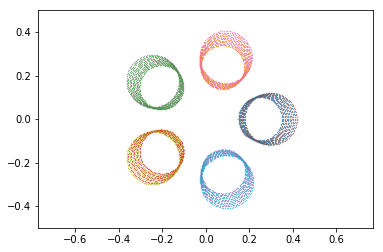

In [91]:
# initialize particle position
centerX=(xMin+xMax)/2.0+xTot*1./4.
centerY=(yMin+yMax)/2.0
radiusCircle=0.1*xTot
dTheta = 2*np.pi / nP
for iTheta in np.arange(nP):
    theta=iTheta * dTheta
    px[iTheta]=centerX+np.sin(theta)*radiusCircle
    py[iTheta]=centerY+np.cos(theta)*radiusCircle
    
for time in np.arange(10*steps):
    # calculation of the cell where the particle is located
    trIX=((px-xMin)*nxc/xTot).astype(int)
    trIY=((py-yMin)*nyc/yTot).astype(int)
    
    # calculate the weights arrays
    #(w1,w2,w3,w4) = calculateWeightsInverse (px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
    #(w1,w2,w3,w4) = calculateWeightsBilinear(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
    (w1,w2,w3,w4) = calculateWeightsArithmetic(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
 
    # calculate the velocity of the particles
    vxp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp,nP)
    vyp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp,nP)   
     
    px += vxp*deltaTime
    py += vyp*deltaTime
    pxNew[:]=px[:]
    pyNew[:]=py[:]
    
    #plot the results every "plotEverySteps"
    if (time % 200)==0:
        plt.scatter(px, py, s=.1, alpha=1.0)
        plt.axis("equal")
 
plt.xlim(xMin,xMax)
plt.ylim(yMin,yMax)
plt.show()

In the output, it is also shown the result of a reversed flow. A reversed flow allows in fact to see if the geometry how large will be cumulative errors. In this case the result is almost perfect, but as we will soon see, this is a product of our very simple rotational flow. A slightly more complicated flow law will show us the weaknesses of this approach, and how to solve them.



### The correction of the advection

We have an opportunity now, again, to check the difference between forward, backward and centered integration scheme. We have shown above a forward integration. Let's look for example at how a different scheme would work. One problem of the above scheme is of course that it uses the __old__ velocity, instead of the new one to advect the particle. Another better way to proceed would be instead to go forward, calculate the new velocity, go back, use the new velocity to go forward. Go forward again, calculate the velocity, go back, an again. These two schemes can be implemented with these lines:

In [92]:
   px+=vxp*deltaTime
   py+=vyp*deltaTime

with the following ones:

In [93]:
    pxOld = pxOld + vxp*deltaTime   
    pyOld = pyOld + vyp*deltaTime   
    px = pxOld + vxp*deltaTime
    py = pyOld + vyp*deltaTime

where pxOld and pyOld are initializated with the same values of px and py, immediately after their definition:

In [94]:
pxOld=px.copy()
pyOld=py.copy()

A solution, similar to the schemes that we used in newtonian simulations, is to use a centered scheme, where the velocity is averaged between the past and the new step. This can be estimated here for example by calculating the position after a half-step, and use that velocity to transport the particle from the old to the new position. 

A possible implementation of the centered scheme is the following, in which one calculates the mid points and the velocity at these midpoints, and then uses the velocity at these midpoints to advect the particles starting from the  position at the beginning of the step:

In [95]:
midPx = px + vxp*deltaTime/2.
midPy = py + vyp*deltaTime/2.
trIX=((midPx-xMin)*nxc/xTot).astype(int)
trIY=((midPy-yMin)*nyc/yTot).astype(int)
(w1,w2,w3,w4)=calculateWeightsInverse(midPx,midPy,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
vxp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp,nP)
vyp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp,nP)  
px += vxp*deltaTime
py += vyp*deltaTime        

where one observes that in order to recalculate the solution one has to determine position of the particles and weights. Although the advantages are clear, it is always important to evaluate whether for our goals it is necessary to take this more complex advection strategy, since it duplicates the calculation necessary to solve our PDE. 

More complex approaches are the "leapfrog", where it is integrated using the a force scheme at half time-steps, and Runge-Kutta of several orders where the information from more intermediate points is used. It is important to take into consideration that these are all explicit advection scheme, in the sense that we do not try to iterate to obtain the correct solution. It would be possible in fact to guess the new position, extract the velocity in the new position, return to the initial position and guess again the new position by considering both the initial and final velocity. This approach is however much more computationally demanding and we do not treat it here, for now. Details about many of these explicit schemes are available on many books and online resources so I do not describe them here in detail, but focus on the implementation, that is always similar.

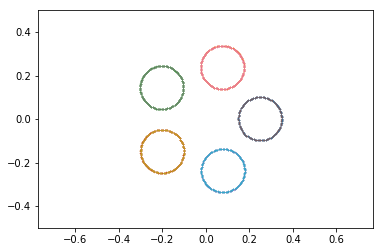

In [96]:
# initialize particle position
centerX=(xMin+xMax)/2.0+xTot*1./4.
centerY=(yMin+yMax)/2.0
radiusCircle=0.1*xTot
dTheta = 2*np.pi / nP
for iTheta in np.arange(nP):
    theta=iTheta * dTheta
    px[iTheta]=centerX+np.sin(theta)*radiusCircle
    py[iTheta]=centerY+np.cos(theta)*radiusCircle
    
for time in np.arange(10*steps):
    # calculation of the cell where the particle is located
    trIX=((px-xMin)*nxc/xTot).astype(int)
    trIY=((py-yMin)*nyc/yTot).astype(int)
    
    # calculate the weights arrays
    #(w1,w2,w3,w4) = calculateWeightsInverse (px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
    (w1,w2,w3,w4) = calculateWeightsBilinear(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
    #(w1,w2,w3,w4) = calculateWeightsArithmetic(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
 
    # calculate the velocity of the particles
    vxp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp,nP)
    vyp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp,nP)   
 
    # update the position of the particles
    pxNew += vxp*deltaTime   
    pyNew += vyp*deltaTime   
    # calculate the velocity of the particles
    #(w1,w2,w3,w4) = calculateWeightsInverse (pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
    (w1,w2,w3,w4) = calculateWeightsBilinear(pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
    #(w1,w2,w3,w4) = calculateWeightsArithmetic(pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)

    vxp2 = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp2,nP)
    vyp2 = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp2,nP)  
    
    px += 0.5*(vxp+vxp2)*deltaTime
    py += 0.5*(vyp+vyp2)*deltaTime
    pxNew[:]=px[:]
    pyNew[:]=py[:]
    
    #plot the results every "plotEverySteps"
    if (time % 200)==0:
        plt.scatter(px, py, s=.1, alpha=1.0)
        plt.axis("equal")
 
plt.xlim(xMin,xMax)
plt.ylim(yMin,yMax)
plt.show()

## Thinning Flow

We can now proceed towards testing a more complex field. Computational literature offers a multiplicity of flows with many properties. We use here one introduced by Bell et al, 1989, that has been often used in the computational literature to test numerical schemes. It proposes a flow that preserves volumes, as we will verify in another section, but heavily deforms the immersed body, because the intensity of the flow is zero at the edges and at the center, and maximum at the mid distance. In this way it creates heavy stretching and filaments that can be reconstructed by reversing the flow to benchmark the numerical strategy:

\begin{align}
vx &= - \sin^2(\pi x) \sin(\pi y) \cos(\pi y) \nonumber \\ 
vy &= \sin^2(\pi y) \sin(\pi x) \cos(\pi x) \label{eq-velocity-field}
\end{align}

confined in the box $[0,1]x[0,1]$.

Let's use the same algorithm as above, but by replacing the flow with:

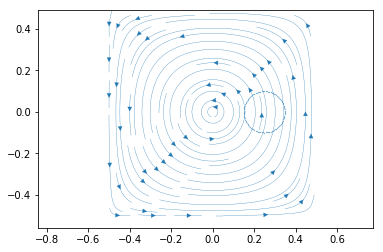

In [97]:
xNorm=(X+xMin)/xTot
yNorm=(Y+yMin)/yTot
for iy in np.arange(0,nyp):
    vx[:,iy] = np.sin(np.pi*xNorm) * np.sin(np.pi*xNorm) * np.sin(np.pi*yNorm[iy]) * np.cos(np.pi*yNorm[iy])
for ix in np.arange(0,nxp):
    vy[ix,:] =- np.sin(np.pi*yNorm) * np.sin(np.pi*yNorm) * np.sin(np.pi*xNorm[ix]) * np.cos(np.pi*xNorm[ix])
    
plt.streamplot( X[0:nxc], Y[0:nyc], vx[0:nxc,0:nyc].transpose(), vy[0:nxc,0:nyc].transpose(), linewidth=.3)
plt.scatter(px, py, s=.05, alpha=1.0)
plt.axis("equal")
plt.show()

And let it run for $T=\pi$. In order to check whether our algorithm is efficient, in case of such a strong deformation, we can reverse the flow and run it for the same amount of time. If the initial setup is properly reproduced, the execution will be correct:

In [98]:
vxp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,-vx,vxp,nP)
vyp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,-vy,vyp,nP)   


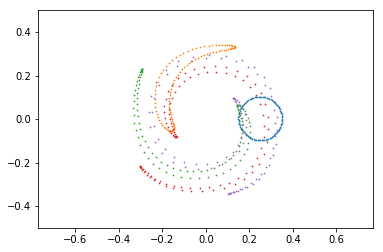

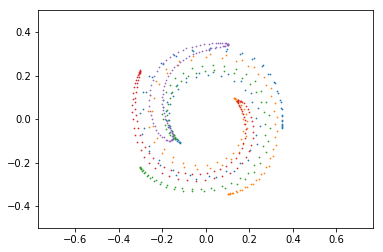

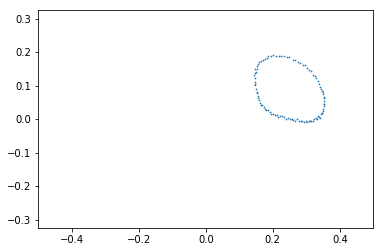

In [99]:
# initialize particle position
centerX=(xMin+xMax)/2.0+xTot*1./4.
centerY=(yMin+yMax)/2.0
radiusCircle=0.1*xTot
dTheta = 2*np.pi / nP
for iTheta in np.arange(nP):
    theta=iTheta * dTheta
    px[iTheta]=centerX+np.sin(theta)*radiusCircle
    py[iTheta]=centerY+np.cos(theta)*radiusCircle
for reverse in np.arange(2):
    if reverse==1:
        vx=-vx
        vy=-vy

    for time in np.arange(steps):
        # calculation of the cell where the particle is located
        trIX=((px-xMin)*nxc/xTot).astype(int)
        trIY=((py-yMin)*nyc/yTot).astype(int)

        # calculate the weights arrays
        #(w1,w2,w3,w4) = calculateWeightsInverse (px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
        #(w1,w2,w3,w4) = calculateWeightsBilinear(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
        (w1,w2,w3,w4) = calculateWeightsArithmetic(px,py,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)

        # calculate the velocity of the particles
        vxp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp,nP)
        vyp = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp,nP)   

        # update the position of the particles
        pxNew += vxp*deltaTime   
        pyNew += vyp*deltaTime   
        # calculate the velocity of the particles
        #(w1,w2,w3,w4) = calculateWeightsInverse (pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP)
        #(w1,w2,w3,w4) = calculateWeightsBilinear(pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)
        (w1,w2,w3,w4) = calculateWeightsArithmetic(pxNew,pyNew,X,Y,trIX,trIY,w1,w2,w3,w4,nP,dx,dy)

        vxp2 = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vx,vxp2,nP)
        vyp2 = projectLatticeToParticles (w1,w2,w3,w4,trIX,trIY,vy,vyp2,nP)  

        px += 0.5*(vxp+vxp2)*deltaTime
        py += 0.5*(vyp+vyp2)*deltaTime
        pxNew[:]=px[:]
        pyNew[:]=py[:]

        #plot the results every "plotEverySteps"
        if (time % 200)==0:
            plt.scatter(px, py, s=.5, alpha=1.0)
            plt.axis("equal")

    plt.xlim(xMin,xMax)
    plt.ylim(yMin,yMax)
    plt.show()

plt.scatter(px, py, s=.5, alpha=1.0)
plt.axis("equal")
plt.xlim(xMin,xMax)
plt.ylim(yMin,yMax)
plt.show()
    